In [1]:
from sklearn.datasets import fetch_openml, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

In [2]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [3]:
X = X/255

In [4]:
digits = 10
examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [5]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

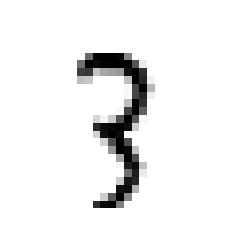

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [6]:
%matplotlib inline

i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

In [7]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [8]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [9]:
def train(learning_rate = 1, epochs = 350):
    
    n_x = X_train.shape[0]
    n_h = 64

    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(digits, n_h)
    b2 = np.zeros((digits, 1))

    X = X_train
    Y = Y_train

    for i in range(epochs):

        Z1 = np.matmul(W1,X) + b1
        A1 = sigmoid(Z1)
        Z2 = np.matmul(W2,A1) + b2
        A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

        cost = compute_multiclass_loss(Y, A2)

        dZ2 = A2-Y
        dW2 = (1./m) * np.matmul(dZ2, A1.T)
        db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

        dA1 = np.matmul(W2.T, dZ2)
        dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
        dW1 = (1./m) * np.matmul(dZ1, X.T)
        db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

        W2 = W2 - learning_rate * dW2
        b2 = b2 - learning_rate * db2
        W1 = W1 - learning_rate * dW1
        b1 = b1 - learning_rate * db1

        if (i % 50 == 0):
            print("Epoch", i, "cost: ", cost)

    print("Final cost:", cost)
    
    Z1 = np.matmul(W1, X_test) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2, A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    predictions = np.argmax(A2, axis=0)
    labels = np.argmax(Y_test, axis=0)
    
    cf_matrix = confusion_matrix(predictions, labels)
    
    %matplotlib inline
    plt.rcParams['figure.figsize'] = [20,10]
    label = ['0','1','2','3','4','5','6','7','8','9']
    df_cm = pd.DataFrame(cf_matrix, label, label)
    sn.set(font_scale=1)
    sn.heatmap(df_cm, annot=True, annot_kws={"size":16})
    plt.show()
    
    print(classification_report(predictions, labels))
    return cost

Epoch 0 cost:  8.184372640542103
Epoch 50 cost:  1.0369089770806628
Epoch 100 cost:  0.7585975215611745
Epoch 150 cost:  0.6410253630575758
Epoch 200 cost:  0.5722420116659445
Epoch 250 cost:  0.5254249954893626
Epoch 300 cost:  0.49068143961701455
Final cost: 0.46395940693318594


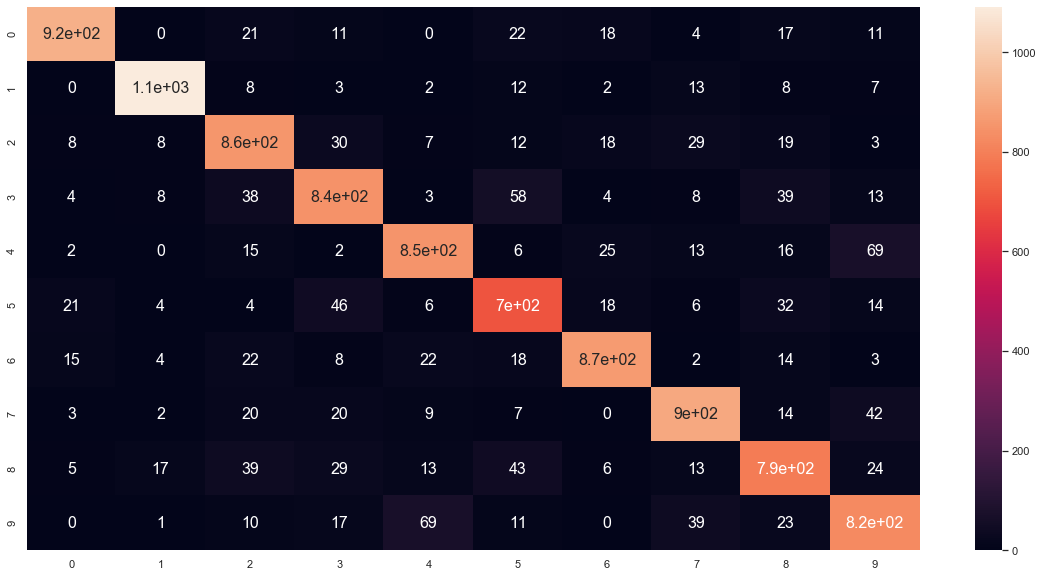

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      1026
           1       0.96      0.95      0.96      1146
           2       0.83      0.86      0.85       989
           3       0.84      0.83      0.83      1019
           4       0.87      0.85      0.86       999
           5       0.79      0.82      0.81       854
           6       0.91      0.89      0.90       975
           7       0.88      0.89      0.88      1018
           8       0.81      0.81      0.81       981
           9       0.82      0.83      0.82       993

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.87     10000

Epoch 0 cost:  8.310652821503114
Epoch 50 cost:  0.7959092513889517
Epoch 100 cost:  0.5280951000133821
Epoch 150 cost:  0.4560913647424878
Epoch 200 cost:  0.4129621542291559
Epoch 250 cost:  0.3828121267131031
Epoch 300 cost:  0.3599691889

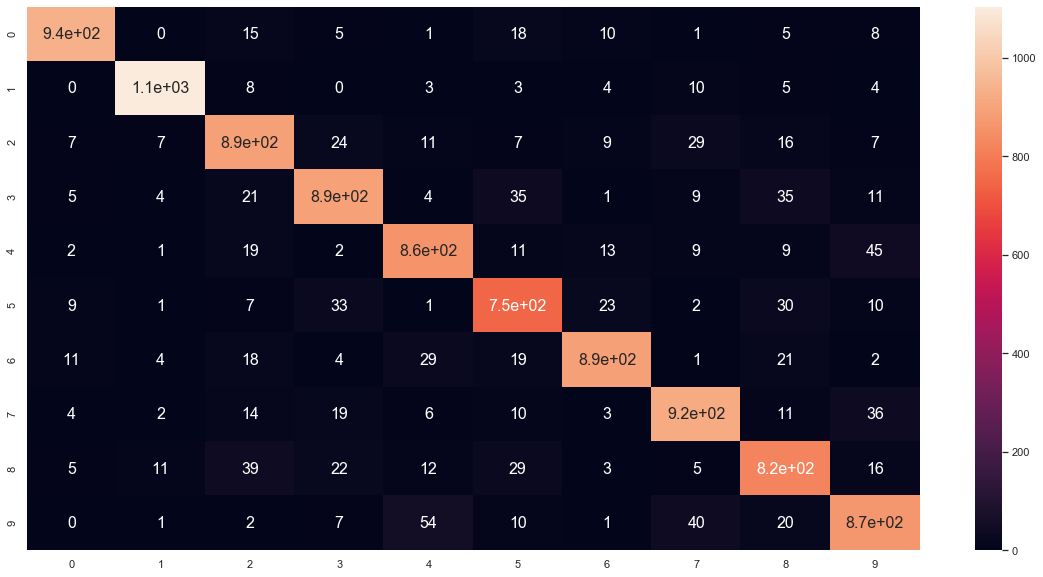

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1000
           1       0.97      0.97      0.97      1141
           2       0.86      0.88      0.87      1006
           3       0.89      0.88      0.88      1019
           4       0.88      0.89      0.88       972
           5       0.84      0.87      0.85       866
           6       0.93      0.89      0.91      1000
           7       0.90      0.90      0.90      1027
           8       0.84      0.85      0.85       964
           9       0.86      0.87      0.86      1005

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Epoch 0 cost:  7.284501857374057
Epoch 50 cost:  0.7038313078357676
Epoch 100 cost:  0.4841305887209639
Epoch 150 cost:  0.41738086270511743
Epoch 200 cost:  0.3773484829274581
Epoch 250 cost:  0.3486703737336587
Epoch 300 cost:  0.326390592

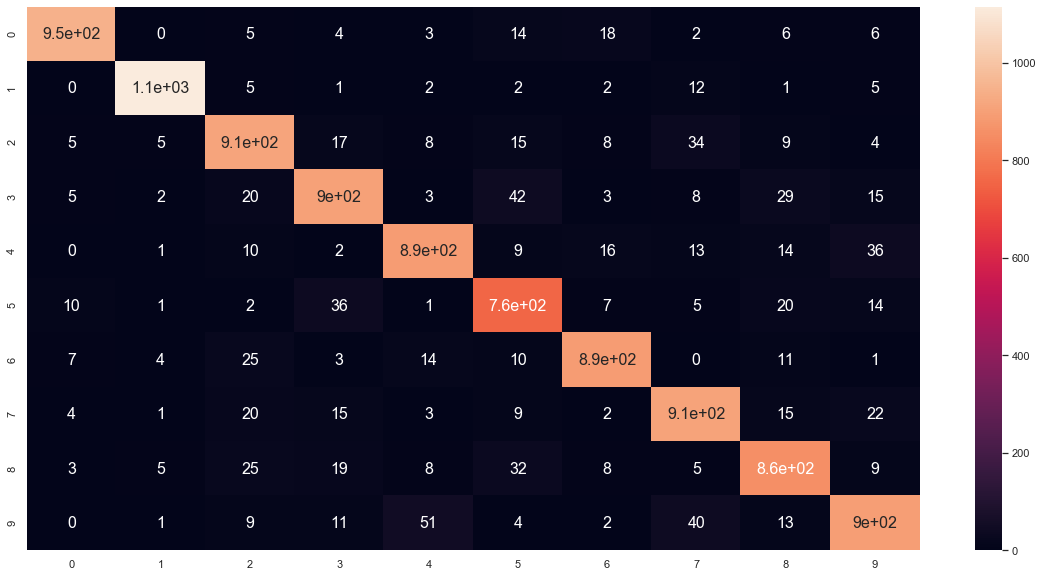

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1004
           1       0.98      0.97      0.98      1145
           2       0.88      0.90      0.89      1016
           3       0.89      0.88      0.88      1029
           4       0.91      0.90      0.90       990
           5       0.85      0.89      0.87       851
           6       0.93      0.92      0.93       967
           7       0.88      0.91      0.90      1000
           8       0.88      0.88      0.88       970
           9       0.89      0.87      0.88      1028

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

Epoch 0 cost:  8.649649318720499
Epoch 50 cost:  0.5687779803544003
Epoch 100 cost:  0.43708340822977415
Epoch 150 cost:  0.3789547527622004
Epoch 200 cost:  0.3422471428983034
Epoch 250 cost:  0.3158213327641509
Epoch 300 cost:  0.295382670

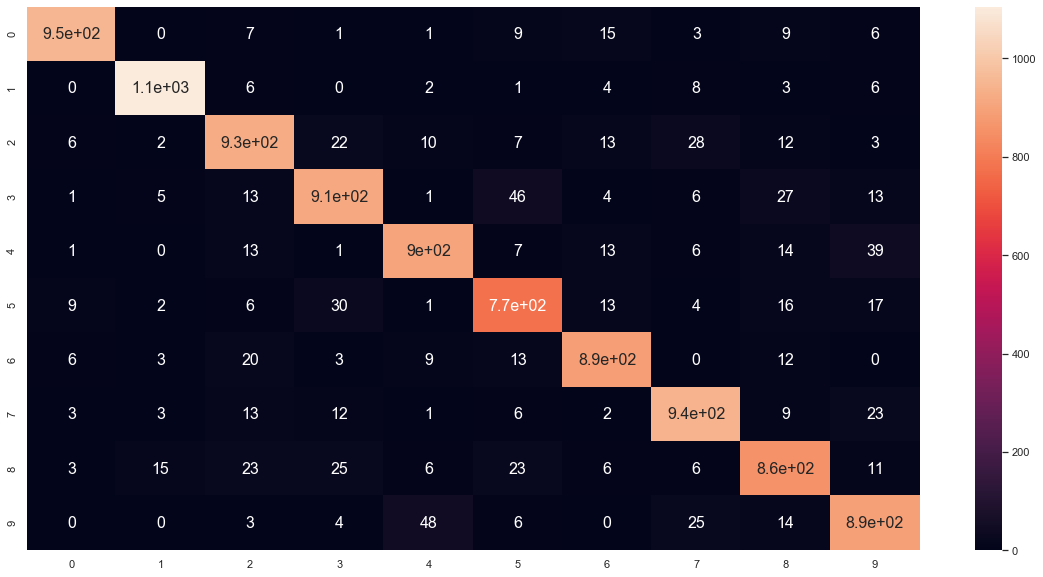

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1002
           1       0.97      0.97      0.97      1135
           2       0.90      0.90      0.90      1031
           3       0.90      0.89      0.89      1028
           4       0.92      0.91      0.91       997
           5       0.87      0.89      0.88       872
           6       0.93      0.93      0.93       954
           7       0.92      0.93      0.92      1014
           8       0.88      0.88      0.88       976
           9       0.88      0.90      0.89       991

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  8.288369263717358
Epoch 50 cost:  0.5945061271369783
Epoch 100 cost:  0.42705908816037647
Epoch 150 cost:  0.3622562622278537
Epoch 200 cost:  0.32302894039631436
Epoch 250 cost:  0.29576364565694047
Epoch 300 cost:  0.2751099

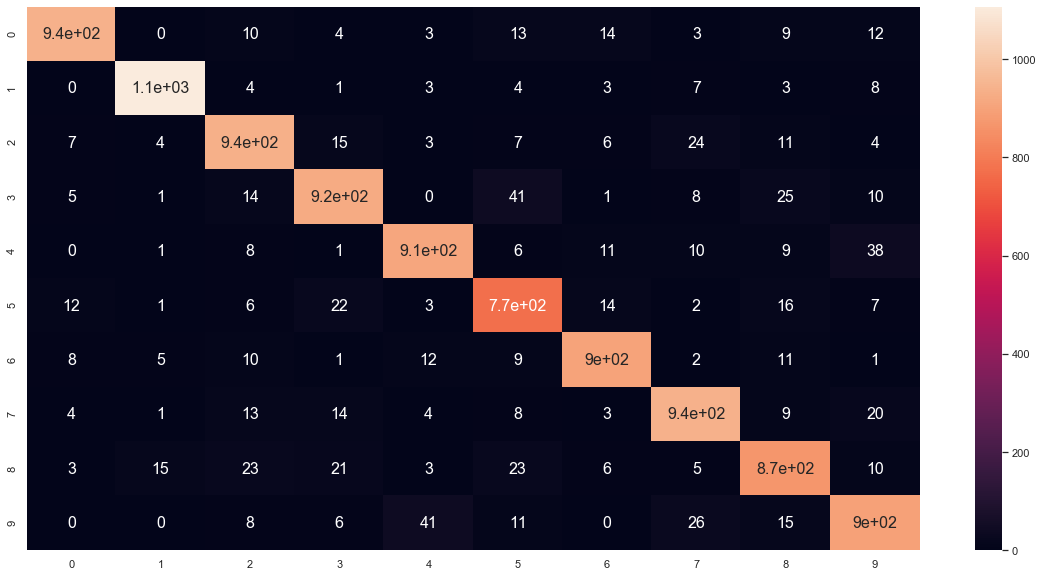

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1009
           1       0.98      0.97      0.97      1140
           2       0.91      0.92      0.91      1017
           3       0.92      0.90      0.91      1030
           4       0.93      0.92      0.92       994
           5       0.86      0.90      0.88       853
           6       0.94      0.94      0.94       959
           7       0.92      0.93      0.92      1017
           8       0.89      0.89      0.89       975
           9       0.89      0.89      0.89      1006

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  8.18637300776279
Epoch 50 cost:  0.5521918088047584
Epoch 100 cost:  0.4129105201640257
Epoch 150 cost:  0.3530471128543235
Epoch 200 cost:  0.31640844444039956
Epoch 250 cost:  0.2902711468159102
Epoch 300 cost:  0.2700855884

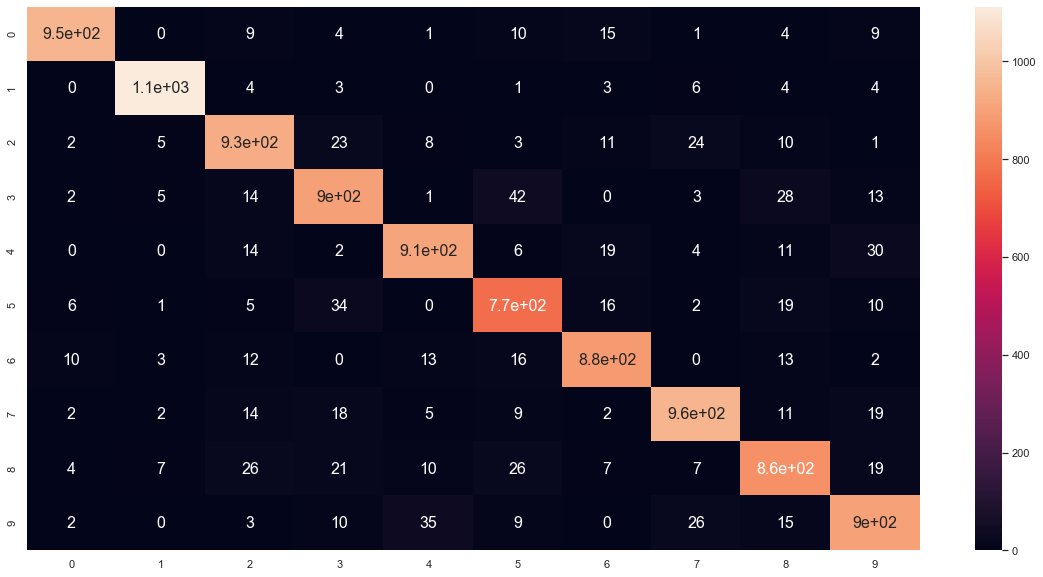

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1005
           1       0.98      0.98      0.98      1137
           2       0.90      0.91      0.91      1018
           3       0.89      0.89      0.89      1003
           4       0.93      0.91      0.92       995
           5       0.86      0.89      0.88       863
           6       0.92      0.93      0.93       954
           7       0.93      0.92      0.92      1037
           8       0.88      0.87      0.88       986
           9       0.89      0.90      0.90      1002

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  7.692549507991684
Epoch 50 cost:  0.5104069044402655
Epoch 100 cost:  0.3821400360727496
Epoch 150 cost:  0.32826393908693313
Epoch 200 cost:  0.293856994068523
Epoch 250 cost:  0.26846850791777427
Epoch 300 cost:  0.248490524

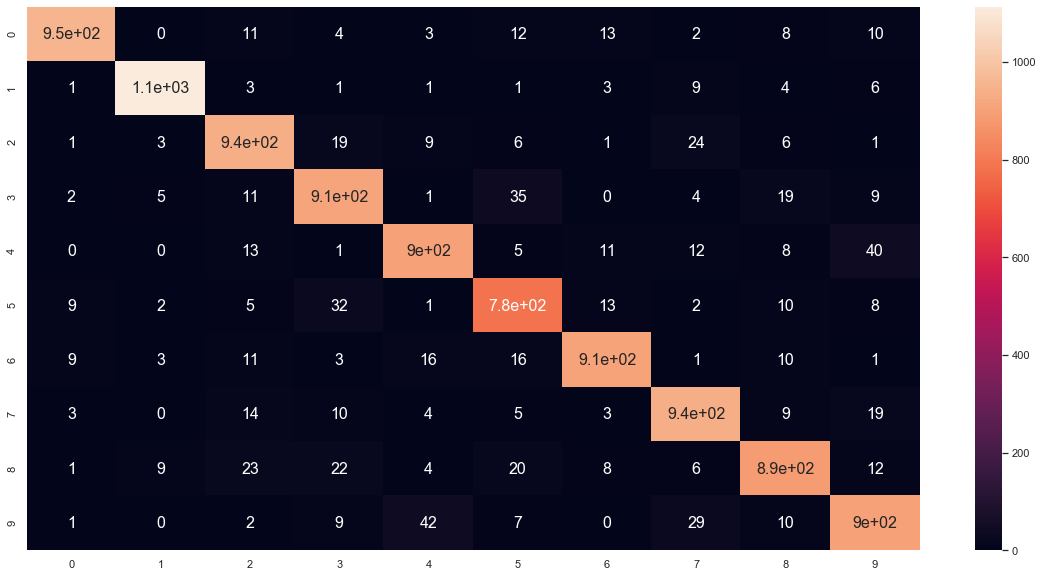

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1016
           1       0.98      0.97      0.98      1142
           2       0.91      0.93      0.92      1009
           3       0.90      0.91      0.91       995
           4       0.92      0.91      0.91       991
           5       0.88      0.91      0.89       867
           6       0.95      0.93      0.94       976
           7       0.91      0.93      0.92      1006
           8       0.91      0.89      0.90       995
           9       0.89      0.90      0.90      1003

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  6.98604657564168
Epoch 50 cost:  0.5698796821397488
Epoch 100 cost:  0.42473566739455065
Epoch 150 cost:  0.35776171536271206
Epoch 200 cost:  0.3156957989853092
Epoch 250 cost:  0.2859999193576113
Epoch 300 cost:  0.263478861

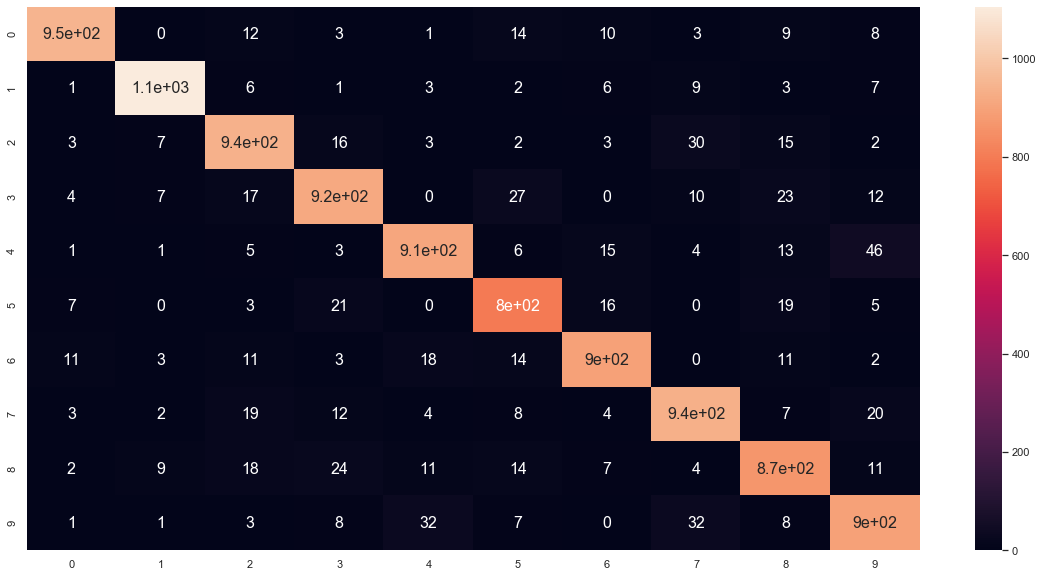

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1007
           1       0.97      0.97      0.97      1143
           2       0.91      0.92      0.91      1019
           3       0.91      0.90      0.91      1019
           4       0.93      0.91      0.92      1004
           5       0.89      0.92      0.91       869
           6       0.94      0.92      0.93       970
           7       0.91      0.92      0.92      1015
           8       0.89      0.90      0.89       966
           9       0.89      0.91      0.90       988

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  7.239416757937429
Epoch 50 cost:  0.603161531081851
Epoch 100 cost:  0.43122683872922957
Epoch 150 cost:  0.36172160772975614
Epoch 200 cost:  0.3223170962757298
Epoch 250 cost:  0.2943950560745513
Epoch 300 cost:  0.272930622

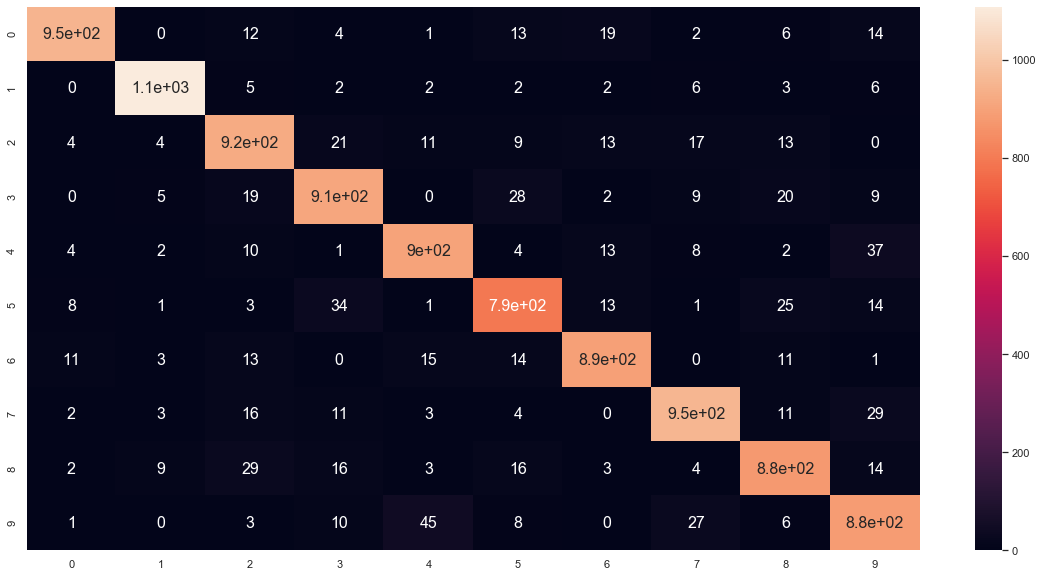

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1019
           1       0.98      0.98      0.98      1136
           2       0.89      0.91      0.90      1014
           3       0.90      0.91      0.91      1003
           4       0.92      0.92      0.92       982
           5       0.89      0.89      0.89       894
           6       0.93      0.93      0.93       961
           7       0.93      0.92      0.93      1033
           8       0.90      0.90      0.90       973
           9       0.88      0.90      0.89       985

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Epoch 0 cost:  9.33185482179344
Epoch 50 cost:  0.5971288121539475
Epoch 100 cost:  0.4231901651072854
Epoch 150 cost:  0.35666201274257253
Epoch 200 cost:  0.3181295758855934
Epoch 250 cost:  0.2916080888666776
Epoch 300 cost:  0.2714081666

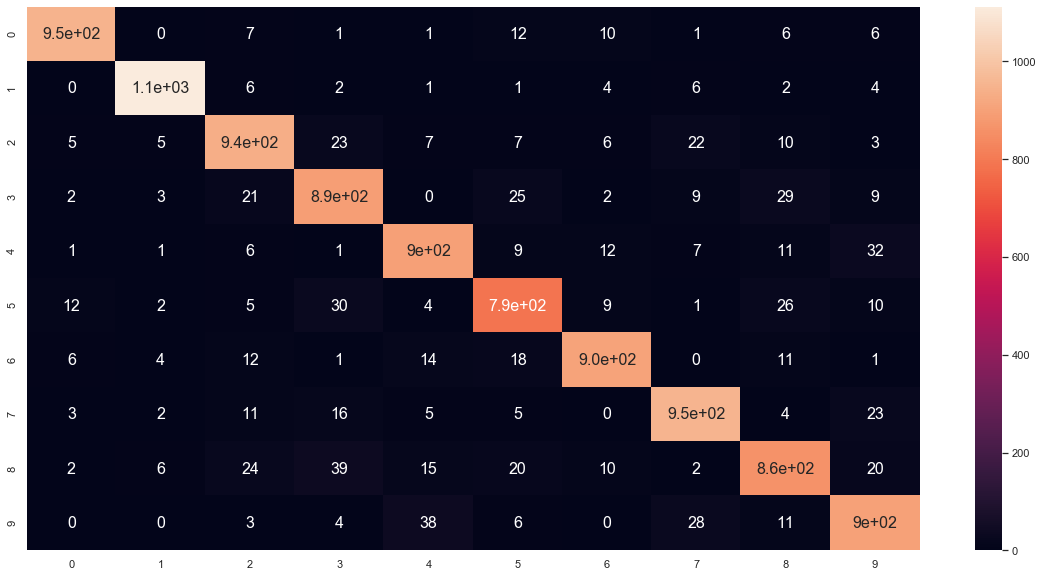

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       993
           1       0.98      0.98      0.98      1138
           2       0.91      0.91      0.91      1025
           3       0.88      0.90      0.89       993
           4       0.91      0.92      0.92       977
           5       0.88      0.89      0.89       888
           6       0.94      0.93      0.94       972
           7       0.93      0.93      0.93      1021
           8       0.89      0.86      0.87      1002
           9       0.89      0.91      0.90       991

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [10]:
cost = []
lr = []
for x in range(10):
    temp = train(learning_rate = (x+1))
    cost.append(temp)
    lr.append((x+1))

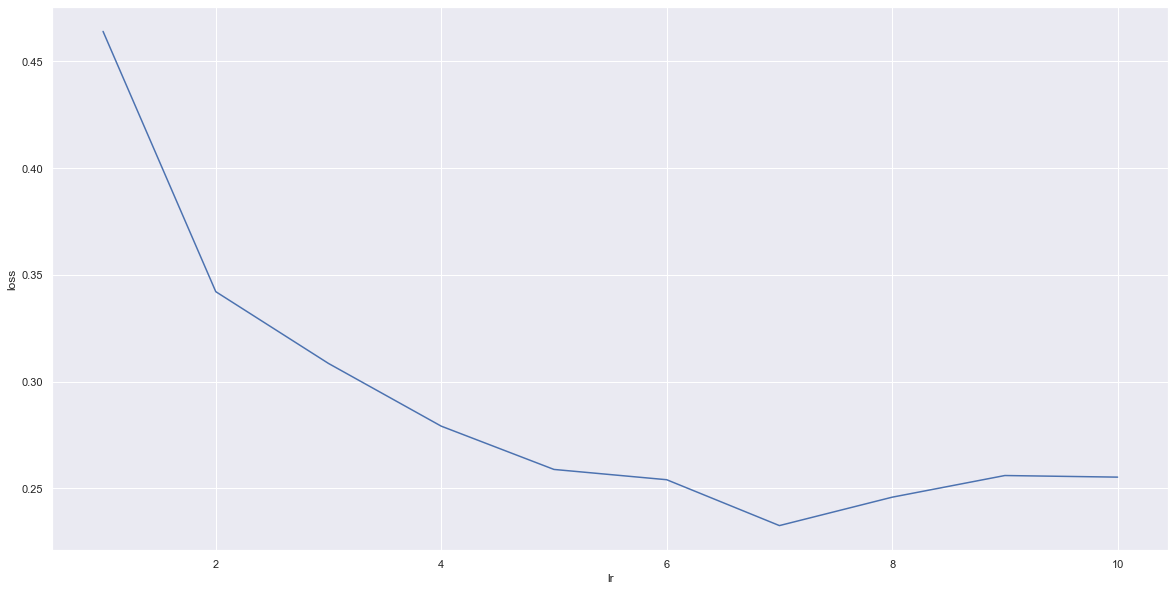

In [11]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,10]
plt.xlabel('lr')
plt.ylabel('loss')
plt.plot(lr, cost)
plt.show()